# Logistic Regression with Stats Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import PyQt5 as qt
%matplotlib qt
sns.set()

#### Train Data Fit and Test

In [2]:
df = pd.read_csv('binary_train_dataset.csv')
df.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [3]:
df['Admitted'] = df['Admitted'].map({'Yes':1,'No':0})
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})
df

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [4]:
y = df['Admitted']
x1 = df[['SAT','Gender']]

In [5]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Jan 2022   Pseudo R-squ.:                  0.8249
Time:                        10:49:34   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

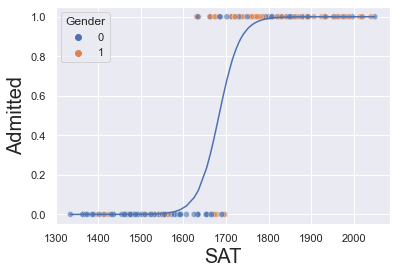

,0
1334,0.0
1363,0.0
1364,0.0
1370,0.0
1374,0.0
...,...
2020,1.0
2020,1.0
2021,1.0
2041,1.0


In [6]:
%matplotlib inline
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1['SAT'],results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1['SAT']))

sns.scatterplot(y=y, x=x1['SAT'], hue=x1['Gender'], alpha=0.6)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C10')
plt.show()

pd.DataFrame(f_sorted.round(2),x_sorted)

In [7]:
#Predictions
results_log.predict()

array([2.24098643e-06, 9.98264069e-01, 9.99997581e-01, 2.25470272e-01,
       2.48392751e-02, 9.92249420e-01, 9.96544212e-01, 9.99963261e-01,
       9.99971204e-01, 1.48031753e-02, 9.99875812e-01, 9.99951185e-01,
       7.60867651e-01, 2.33384671e-06, 5.96283811e-01, 9.99834996e-01,
       1.14446654e-01, 1.18626448e-01, 5.05147726e-01, 9.99865308e-01,
       9.99999366e-01, 9.99997048e-01, 1.71939595e-04, 5.61635704e-03,
       9.68663798e-01, 9.99644611e-01, 4.84851641e-01, 9.91962775e-01,
       9.99828160e-01, 9.94609023e-01, 1.15028367e-04, 8.32585363e-01,
       2.47449367e-01, 9.99998840e-01, 9.98847293e-01, 9.99372736e-01,
       3.12716933e-01, 9.99932453e-01, 2.32639633e-01, 5.29744519e-05,
       1.95739604e-02, 4.54521689e-01, 9.99956956e-01, 2.97763113e-06,
       9.94178832e-01, 1.77714430e-05, 9.93914956e-01, 2.29360536e-04,
       3.30501192e-04, 6.89914934e-03, 4.24966754e-03, 9.99999657e-01,
       9.23952460e-01, 2.28569785e-02, 9.99994550e-01, 5.47478329e-06,
      

In [8]:
#Confusion Matrix
results_log.pred_table()

array([[69.,  5.],
       [ 4., 90.]])

In [9]:
#Confusion Matrix Formatted
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [10]:
#Accuracy
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

In [11]:
#Missclassification Ratio
missclassification_rate = (cm[0,1]+cm[1,0])/cm.sum()
missclassification_rate

0.05357142857142857

#### Test Data Fit and Test

In [12]:
df_test = pd.read_csv('binary_test_dataset.csv')
df_test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [13]:
df_test['Admitted'] = df_test['Admitted'].map({'Yes':1,'No':0})
df_test['Gender'] = df_test['Gender'].map({'Female':1,'Male':0})
df_test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [14]:
test_actual_data = df_test['Admitted']
test_data = df_test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [15]:
def confusion_matrix_ecuation(data,actual_data,model):
    
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_data, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [16]:
cm = confusion_matrix_ecuation(test_data,test_actual_data,results_log)
cm

(array([[ 5.,  1.],
        [ 1., 12.]]),
 0.8947368421052632)

#### Results

In [17]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [18]:
('Missclassification rate: '+str((cm_df.iloc[0,1]+cm_df.iloc[1,0])/cm_df.sum().sum()))

'Missclassification rate: 0.10526315789473684'

In [19]:
#Predicts just 1 Value
def predicts(value: float, gender: bool):
    result = results_log.predict([1,value,gender]).round(2)
    return result

In [20]:
predicts(1634,0)

array([0.12])

# Logistic Regression with Sklearn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PyQt5 import Qt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set()

#### Data Preprocessing

In [22]:
df1 = pd.read_csv('binary_train_dataset.csv')
df2 = pd.read_csv('binary_test_dataset.csv')
df = pd.concat([df1,df2])
df

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
14,1726,No,Male
15,1876,Yes,Female
16,1485,No,Male
17,1500,No,Female


In [23]:
df.iloc[:,1] = df.iloc[:,1].map({'Yes':1,"No":0})
df.iloc[:,2] = df.iloc[:,2].map({'Female':1,"Male":0})
df

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
14,1726,0,0
15,1876,1,1
16,1485,0,0
17,1500,0,1


#### Modelling

In [24]:
x1 = df[["SAT","Gender"]]
y = df["Admitted"]

In [25]:
x1_train, x1_test, y_train, y_test = train_test_split(x1,y, test_size=0.2, random_state=1)

In [26]:
log_reg = LogisticRegression()
log_reg.fit(x1_train,y_train)

LogisticRegression()

In [27]:
yhat = log_reg.predict(x1_test)
yhat

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [28]:
np.array(y_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

#### Results

In [29]:
cm = confusion_matrix(yhat,y_test)
cm

array([[17,  0],
       [ 3, 18]], dtype=int64)

In [30]:
cm = pd.DataFrame(cm, columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cm

,Predicted 0,Predicted 1
Actual 0,17,0
Actual 1,3,18


In [31]:
('Prediction rate: '+str((cm_df.iloc[0,0]+cm_df.iloc[1,1])/cm_df.sum().sum()))

'Prediction rate: 0.8947368421052632'

In [32]:
('Missclassification rate: '+str((cm_df.iloc[0,1]+cm_df.iloc[1,0])/cm_df.sum().sum()))

'Missclassification rate: 0.10526315789473684'

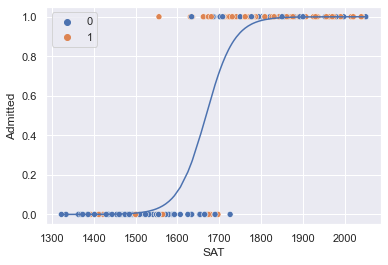

In [53]:
#Plot
def log_reg_ecuation():
    return np.exp(log_reg.intercept_ + log_reg.coef_[0][0] * x1['SAT'])/(1+np.exp(log_reg.intercept_ + log_reg.coef_[0][0] * x1['SAT']))

plt.clf()
sns.scatterplot(x=x1['SAT'], y=y, hue=x1['Gender'])
sns.lineplot(x=np.sort(np.array(x1['SAT'])),y=np.sort(log_reg_ecuation()))
plt.show()

In [84]:
#Predict Class of New Values
log_reg.predict([[1769,1]])

C:\Users\aldan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [80]:
#Predict Class Probability of New Values (0/1)
log_reg.predict_proba([[1769,1]])

C:\Users\aldan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.01722845, 0.98277155]])